In [1]:
import numpy as np
from numpy import linalg as la
import math
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Exercise 1

In [2]:
def newton_cotes(g, a, b, N, method = "midpoint"):
    '''
    g: a function of x
    a, b: lower and upper bound of integration
    N: number of intervals cutted
    method: \in {"midpoint", "trapezoid", "Simpsons"}
    '''
    
    if method == "midpoint":
        # Since there are N intervals, there should be N midpoints
        midpoints = np.zeros(N)
        temp = 0
        for i in range(N):
            midpoints[i] = a + (2*i+1)*(b-a)/(2*N)
            temp += g(midpoints[i])    
        result = (b-a)/N * temp
    elif method == "trapezoid":
        # N intervals would yield N+1 points
        endpoints = np.zeros(N+1)
        for i in range(N+1):
            endpoints[i] = a + (b-a)*i/N
        temp = 0
        for i in range(1, N):
            temp += g(endpoints[i])
        result = (b-a)/(2*N)*(g(a) + 2 * temp + g(b))
    elif method == "Simpsons":
        #For N intervals there are N+1 endpoints and N sample points
        samplepoints = np.zeros(2*N+1)
        for i in range(2*N+1):
            samplepoints[i] = a + i *(b-a) / (2*N) 
        temp = 0
        for i in range(1, 2*N):
            # loop from i = 1 to 2N-1
            if i%2 == 1:
                # if i is odd
                temp += 4*g(samplepoints[i])
            else:
                # i is even
                temp += 2*g(samplepoints[i])
        result = (b-a)/3/(2*N)*(g(a) + temp + g(b))
        # note that the distance h between two points is (b-a)/(2N)
    else:
        raise ValueError
    return result

In [3]:
g = lambda x : 0.1 * x**4 - 1.5 * x**3 + 0.53 * x**2 + 2*x +1
print("Integrate from -10 to 10, the analytical result is 4373.333")
print("Composite midpoint method, 100 intervals: ",newton_cotes(g, -10, +10, 100))
print("Composite trapezoid method, 100 intervals: ",newton_cotes(g, -10, +10, 100, "trapezoid"))
print("Composite Simpson's method, 100 intervals: ",newton_cotes(g, -10, +10, 100, "Simpsons"))

Integrate from -10 to 10, the analytical result is 4373.333
Composite midpoint method, 100 intervals:  4371.964759999999
Composite trapezoid method, 100 intervals:  4376.07056
Composite Simpson's method, 100 intervals:  4373.333360000001


# Exercise 2

In [4]:
from scipy.stats import norm
def normal_approximation(mu, sigma, N, k):
    nodes = np.linspace(mu-k*sigma, mu+k*sigma, N)
    weights = np.ones(N)
    # N must be greater than or equal to 2
    weights[0] = norm.cdf((nodes[0]+nodes[1])/2, mu, sigma)
    weights[-1] = 1-norm.cdf((nodes[-1]+nodes[-2])/2, mu, sigma)
    
    pdf = lambda x : 1/ np.sqrt(2*np.pi * sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    for i in range(1, N-1):
        zmin = (nodes[i-1]+nodes[i])/2
        zmax = (nodes[i]+nodes[i+1])/2
        weights[i] = newton_cotes(pdf, zmin, zmax, 400, method = "Simpsons")
        
    return nodes, weights

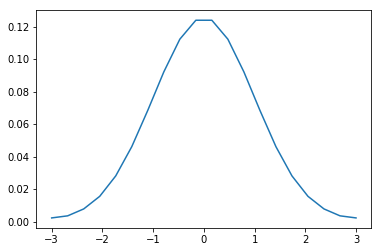

In [5]:
#we can approximate normal distribution
x, y= normal_approximation(0, 1, 20, 3)
plt.plot(x, y)

# Exercise 3

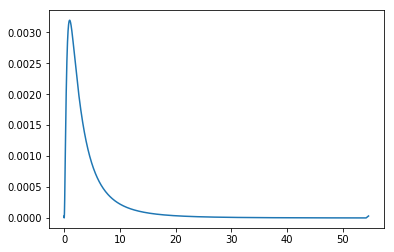

In [6]:
def lognormal_approx(mu, sigma, N, k):
    nodes, weights = normal_approximation(mu, sigma, N, k)
    nodes = np.exp(nodes)
    return nodes, weights

nodes, weights = lognormal_approx(0, 1, 1000, 4)
plt.plot(nodes, weights)


# Exercise 4

In [7]:
weights, nodes = lognormal_approx(10.5, 0.8, 1000, 6)
print("The estimated expected value is ",(weights * nodes).sum())
print("The true expected value is ", np.exp(10.5 + 0.5 * 0.8 **2))

The estimated expected value is  50011.27880633197
The true expected value is  50011.087008521754


# Exercise 5

In [8]:
import scipy.optimize as opt
import math

a = -10
b = 10
#approximate each term 
def equations(x):
    eq1 = x[0] + x[1] + x[2] - (b - a)
    eq2 = x[0] * x[3] + x[1] * x[4] + x[2] * x[5] - ((1/2) * b ** 2 - (1/2) * a ** 2)
    eq3 = x[0] * x[3] ** 2 + x[1] * x[4] ** 2 + x[2] * x[5] ** 2 - ((1/3) * b ** 3 - (1/3) * a ** 3)
    eq4 = x[0] * x[3] ** 3 + x[1] * x[4] ** 3 + x[2] * x[5] ** 3 - ((1/4) * b ** 4 - (1/4) * a ** 4)
    eq5 = x[0] * x[3] ** 4 + x[1] * x[4] ** 4 + x[2] * x[5] ** 4 - ((1/5) * b ** 5 - (1/5) * a ** 5)
    eq6 = x[0] * x[3] ** 5 + x[1] * x[4] ** 5 + x[2] * x[5] ** 5 - ((1/6) * b ** 6 - (1/6) * a ** 6)
    return np.array([eq1, eq2, eq3, eq4, eq5, eq6])
#opt.root is sensitive to init_guess                        
x = opt.root(equations,(5, 3, 4, -5, 5, 3)).x
weights = x[0:3]
nodes = x[3: 6]
result = 0
for i in range(3): 
    result += (g(nodes[i])) * (weights[i])
print(result)

4373.333333432907


# Exercise 6

In [9]:
from scipy.integrate import quad
print(quad(g, -10, 10)[0])

4373.333333333334


Observe that is result is exact.

# Exercise 7

In [10]:
from numpy.random import uniform
def monte_carlo_pi(func, draws):
    x_vec = uniform(-1, 1, draws)
    y_vec = uniform(-1, 1, draws)
    #the N coordinates are given by (x_vec[i], y_vec[i])
    
    temp = 0
    for i in range(draws):
        temp += func(np.array([x_vec[i], y_vec[i]]))
    
    return temp * 4 / draws

def pi_func(vec):
    x = vec[0]
    y = vec[1]
    if (x**2 + y**2)<=1:
        return 1
    return 0

monte_carlo_pi(pi_func, 100000)

3.14456

In [11]:
i = 100000
error = np.abs(monte_carlo_pi(pi_func, i) - 3.1415)
while error >= 0.00005:
    i = i + 100
    error = np.abs(monte_carlo_pi(pi_func, i) - 3.1415)
print(i)

117600


# Exercise 8

In [18]:
def get_n_primes(n):
    # return an nparray of first n prime numbers
    primes = np.array([])
    if n == 0:
        return primes
    # if n >= 1, the first element is 2
    primes = np.append(primes, 2)
    
    x = 3
    while True:
        if len(primes)==n:
            return primes
        
        i=0
        isPrime = True
        while (i < len(primes)) and (primes[i] <= math.sqrt(x)):
            if x%primes[i]==0:
                isPrime = False
                break
            i = i + 1
        if (isPrime):
            primes = np.append(primes, x)
        x = x+1
    return primes
    
def get_point(n, dimension, method):
    if method == "Weyl":
        primes = get_n_primes(dimension)
        primes = primes ** 0.5 * n - np.floor(primes ** 0.5 * n)
        return primes
    if method == "Haber":
        primes = get_n_primes(dimension)
        temp = n*(n+1)/2*np.sqrt(primes)
        return temp - np.floor(temp)
    if method == "Niederreiter":
      
        
        expo = np.arange(1, dimension+1)
        expo = expo / (dimension+1)
        result = 2**expo * n
        result = result - np.floor(result)
        return result
    
        '''
        ar = np.arange(1, dimension + 1)
        x = n * (2 ** (ar / (dimension + 1)))
        x_floor = np.floor(x)
        seq_elem = x - x_floor
        return seq_elem
        '''
    if method == "Baker":
        primes = get_n_primes(dimension)
        #primes = np.arange(1, dimension+1)
        temp = np.exp(primes)*n
        return temp - np.floor(temp)
        
        

In [19]:
get_point(5, 2, "Baker")

array([0.94528049, 0.42768462])

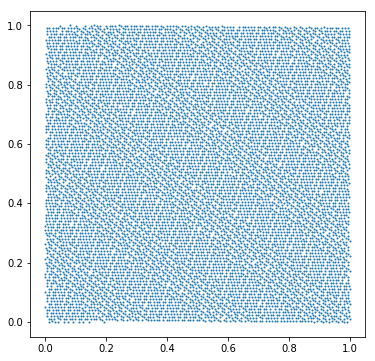

In [20]:
x_coordi = np.zeros(10000)
y_coordi = np.zeros(10000)
for i in range(1,10001):
    x, y = get_point(i, 2, "Niederreiter")
    y_coordi[i-1] = y
    x_coordi[i-1] = x
plt.figure(figsize = (6,6))
plt.plot(x_coordi, y_coordi, "o", markersize = 1)

# Exercise 9

In [73]:
# we need to scale sample points to make them fall into [-1,1]
# one way to do that is to multiply the coordinate by 2 and then substract 1

# generate 100000 points
x_co = np.zeros(100000)
y_co = np.zeros(100000)
for i in range(1,100001):
    x, y = get_point(i, 2, "Baker")
    y_co[i-1] = y
    x_co[i-1] = x
# rescale the coordinates
x_co = x_co * 2 - 1
y_co = y_co * 2 - 1

#use sample points to estimate pi

est = 0
for i in range(100000):
    est += pi_func(np.array([x_co[i], y_co[i]]))
    
est = 4 / 100000 * est
print(est)

3.1418800000000005
